In [1]:
import matplotlib.pyplot as plt
import numpy as np
import json
import glob

In [2]:
Benchmark_Dict = {"Checkpoints": {}, "Mixtures": {"All":{}, "Filtered":{"From Instruct":{}, "From Pretrained":{}}}}

In [3]:
Checkpoints_path = './Benchamrks/Checkpoints'
Mictures_path = './Benchamrks/Mixture'

chk_jsons = glob.glob(Checkpoints_path + '/*.json')
all_jsons = glob.glob(Mictures_path + '/All/*.json')
filtered_from_instruct_jsons = glob.glob(Mictures_path + '/Filtered/From Instruct/*.json')
filtered_from_pretrained_jsons = glob.glob(Mictures_path + '/Filtered/From Pretrained/*.json')

for chk_json in chk_jsons:
    with open(chk_json) as f:
        data = json.load(f)
    out_dict = {"Math": data["math"]['acc'],
                "GSM8k": data["gsm8k"]['acc'],
                "Math OAI": data["math_oai"]['acc'],
                "GSM Hard": data["gsm_hard"]['acc'],
                "MBPP": data["mbpp"]['base']['pass@1']*100,
                "MBPP++": data["mbpp"]['+']['pass@1']*100,
                "MMLU": data["mmlu"]['overall']*100}
    Benchmark_Dict["Checkpoints"][chk_json.split('/')[-1].split('.json')[0]] = out_dict

for all_json in all_jsons:
    with open(all_json) as f:
        data = json.load(f)
    out_dict = {"Math": data["math"]['acc'],
                "GSM8k": data["gsm8k"]['acc'],
                "Math OAI": data["math_oai"]['acc'],
                "GSM Hard": data["gsm_hard"]['acc'],
                "MBPP": data["mbpp"]['base']['pass@1']*100,
                "MBPP++": data["mbpp"]['+']['pass@1']*100,
                "MMLU": data["mmlu"]['overall']*100}
    Benchmark_Dict["Mixtures"]["All"][all_json.split('/')[-1].split('.json')[0].title()] = out_dict

for filtered_from_instruct_json in filtered_from_instruct_jsons:
    with open(filtered_from_instruct_json) as f:
        data = json.load(f)
    out_dict = {"Math": data["math"]['acc'],
                "GSM8k": data["gsm8k"]['acc'],
                "Math OAI": data["math_oai"]['acc'],
                "GSM Hard": data["gsm_hard"]['acc'],
                "MBPP": data["mbpp"]['base']['pass@1']*100,
                "MBPP++": data["mbpp"]['+']['pass@1']*100,
                "MMLU": data["mmlu"]['overall']*100}
    Benchmark_Dict["Mixtures"]["Filtered"]["From Instruct"][filtered_from_instruct_json.split('/')[-1].split('.json')[0].title()] = out_dict

for filtered_from_pretrained_json in filtered_from_pretrained_jsons:
    with open(filtered_from_pretrained_json) as f:
        data = json.load(f)
    out_dict = {"Math": data["math"]['acc'],
                "GSM8k": data["gsm8k"]['acc'],
                "Math OAI": data["math_oai"]['acc'],
                "GSM Hard": data["gsm_hard"]['acc'],
                "MBPP": data["mbpp"]['base']['pass@1']*100,
                "MBPP++": data["mbpp"]['+']['pass@1']*100,
                "MMLU": data["mmlu"]['overall']*100}
    Benchmark_Dict["Mixtures"]["Filtered"]["From Pretrained"][filtered_from_pretrained_json.split('/')[-1].split('.json')[0].title()] = out_dict

In [4]:
# cmap = "RdPu"
# cmap = "Blues"
# cmap = "viridis"
cmap = "YlGnBu"
# cmap = "YlOrBr"

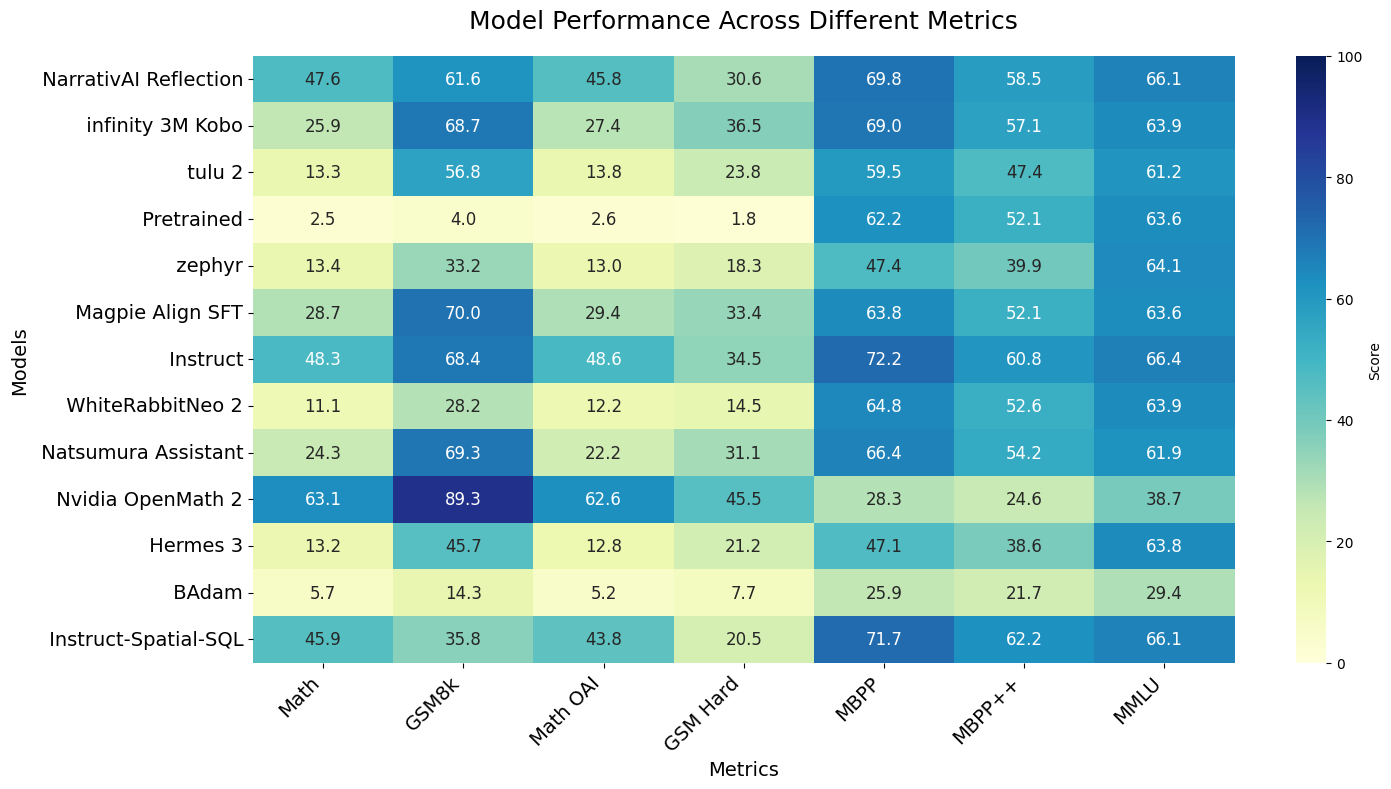

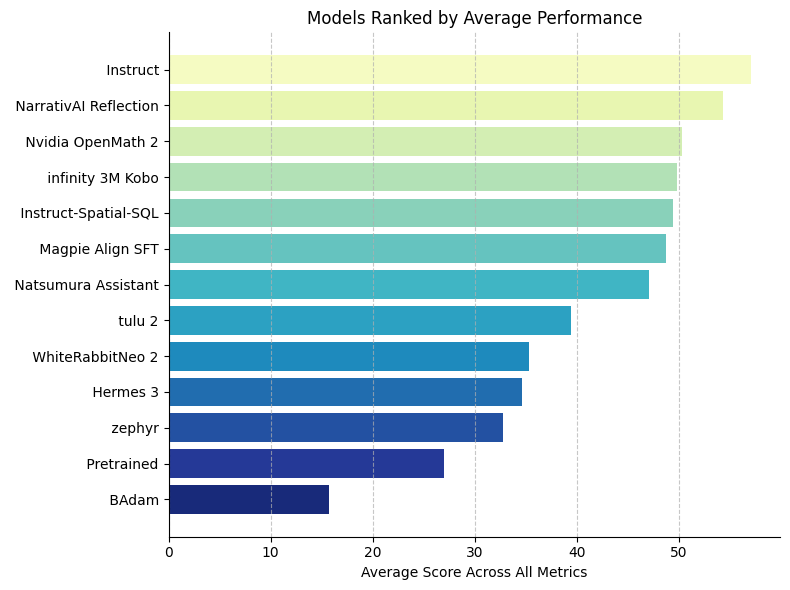

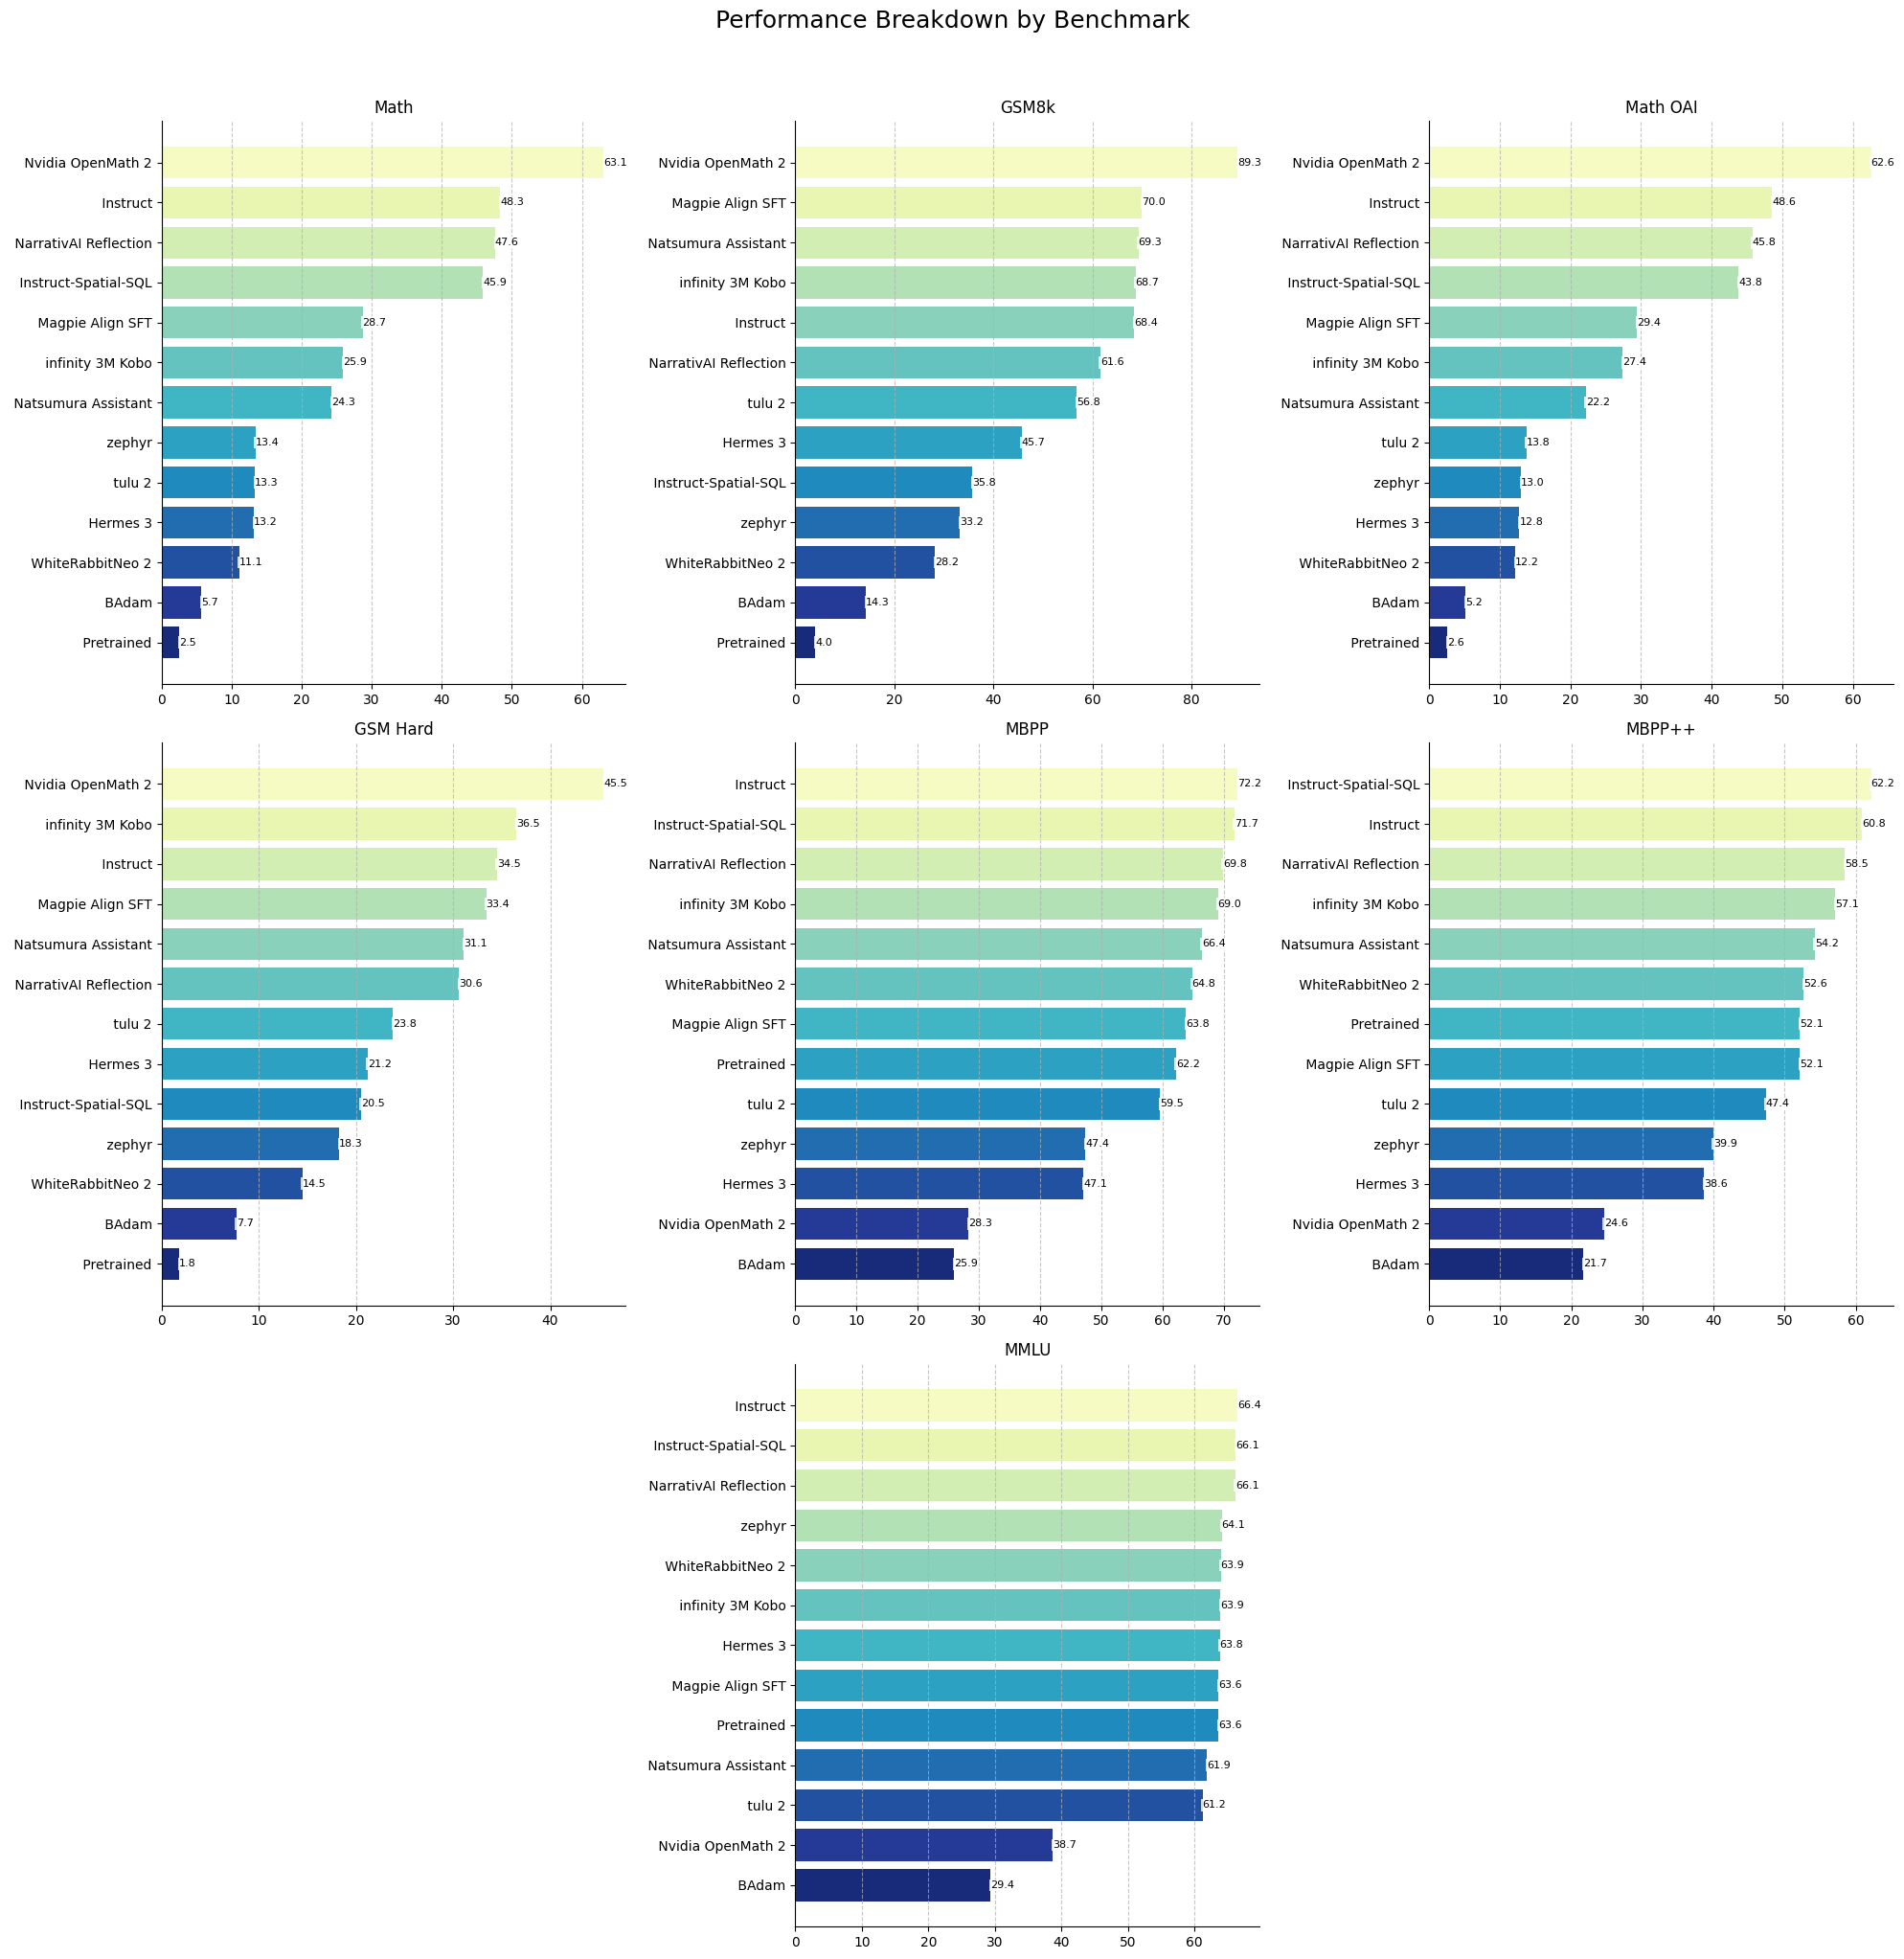

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert nested dictionary structure to DataFrame
checkpoints = Benchmark_Dict['Checkpoints']
data = []


for model, scores in checkpoints.items():
    row = {'Model': model.replace('Llama 3.1 8B', '')}
    row.update(scores)
    data.append(row)

df = pd.DataFrame(data)

metrics = ['Math', 'GSM8k', 'Math OAI', 'GSM Hard', 'MBPP', 'MBPP++', 'MMLU']

# Set style and create consistent color palette
plt.style.use('default')
custom_cmap = sns.color_palette(cmap, as_cmap=True)  # Deep Purple to Teal
sequential_palette = sns.color_palette(cmap, n_colors=len(df))

# Create heatmap
plt.figure(figsize=(15, 8))
heatmap_data = df.set_index('Model')[metrics]

sns.heatmap(heatmap_data, 
            annot=True, 
            fmt='.1f', 
            cmap=custom_cmap,
            annot_kws={'size': 12},
            center=50,
            vmin=0,
            vmax=100,
            cbar_kws={'label': 'Score'})

plt.title('Model Performance Across Different Metrics', pad=20, fontsize=18)
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Metrics', fontsize=14)
plt.ylabel('Models', fontsize=14)
plt.tight_layout()
plt.savefig('heatmap.svg')
plt.show()

# Create enhanced average performance plot
plt.figure(figsize=(8, 6))
df['Average'] = df[metrics].mean(axis=1)
avg_performance = df.sort_values('Average', ascending=True)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.barh(avg_performance['Model'], 
         avg_performance['Average'],
         color=sequential_palette[::-1])  # Using consistent palette
plt.xlabel('Average Score Across All Metrics')
plt.title('Models Ranked by Average Performance')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Create grid of performance plots for each benchmark
fig, axes = plt.subplots(3, 3, figsize=(20, 20))
axes = axes.ravel()

for idx, metric in enumerate(metrics):
    sorted_df = df.sort_values(metric, ascending=True)
    if idx == len(metrics) - 1:
        ax = axes[-2]
    else:
        ax = axes[idx]
    
    # Create horizontal bar plot
    bars = ax.barh(sorted_df['Model'], 
                   sorted_df[metric],
                   color=sequential_palette[::-1])  # Using consistent palette
    
    # Customize appearance
    ax.set_title(f'{metric}')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.grid(axis='x', linestyle='--', alpha=0.7)
    
    # Add value labels on the bars
    for bar in bars:
        width = bar.get_width()
        ax.text(width, bar.get_y() + bar.get_height()/2, 
                f'{width:.1f}', 
                ha='left', va='center', fontsize=8,
                bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', pad=1))

# Remove the empty subplot
if len(metrics) < 9:
    axes[-1].remove()
    axes[-3].remove()

plt.suptitle('Performance Breakdown by Benchmark', fontsize=18, y=1.02)
plt.tight_layout()
plt.show()

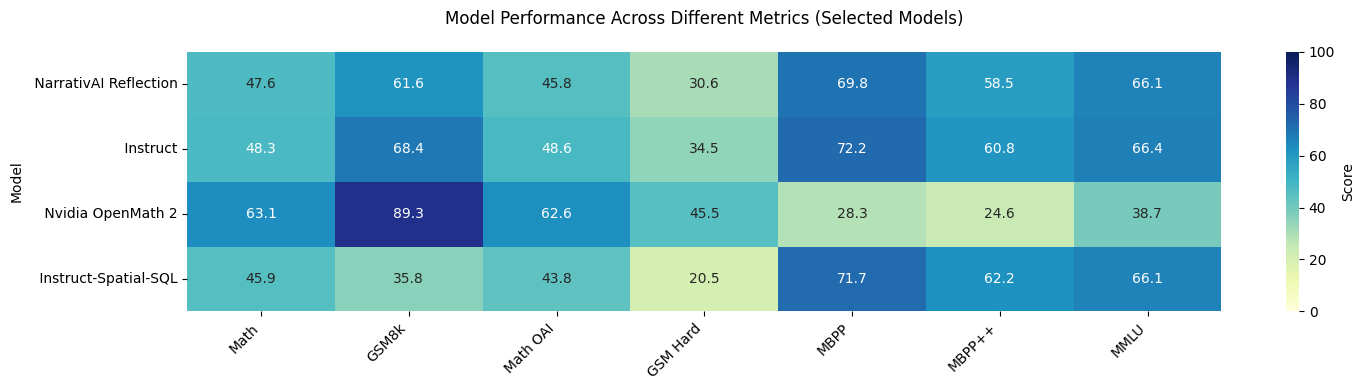

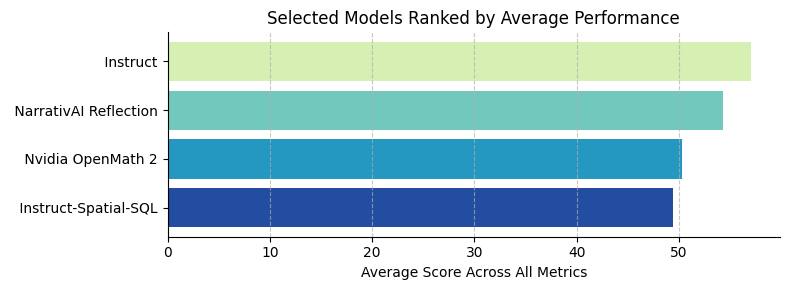

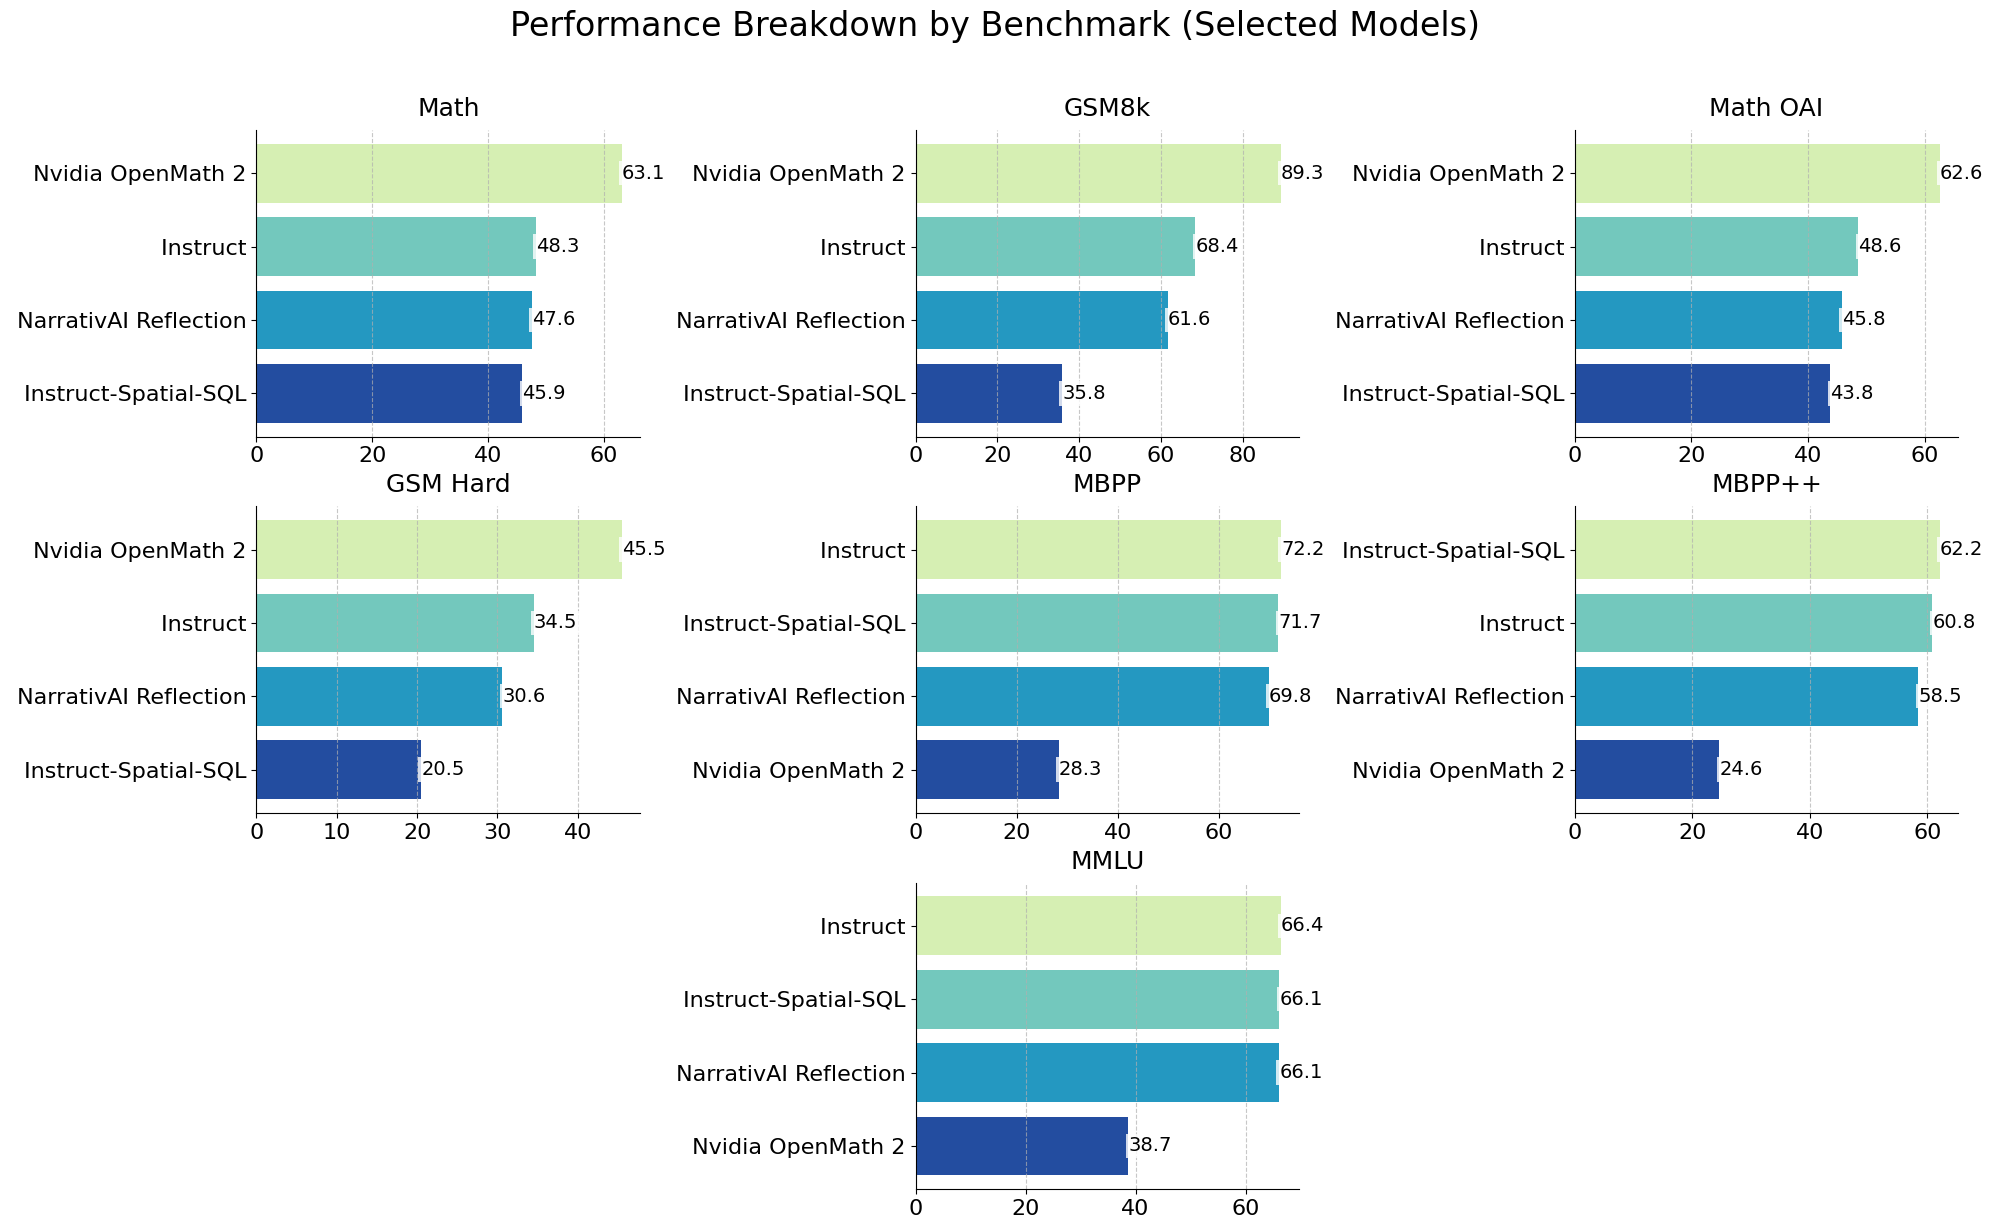

In [20]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert nested dictionary structure to DataFrame and filter for specific checkpoints
checkpoints = Benchmark_Dict['Checkpoints']
selected_models = [
    'Llama 3.1 8B Instruct',
    'Llama 3.1 8B Nvidia OpenMath 2',
    'Llama 3.1 8B NarrativAI Reflection',
    'Llama 3.1 8B Instruct-Spatial-SQL'
]

data = []
for model, scores in checkpoints.items():
    if model in selected_models:
        row = {'Model': model.replace('Llama 3.1 8B', '')}
        row.update(scores)
        data.append(row)

df = pd.DataFrame(data)
metrics = ['Math', 'GSM8k', 'Math OAI', 'GSM Hard', 'MBPP', 'MBPP++', 'MMLU']

# Set style and create consistent color palette
plt.style.use('default')
custom_cmap = sns.color_palette(cmap, as_cmap=True)
sequential_palette = sns.color_palette(cmap, n_colors=len(df))

# Create heatmap
plt.figure(figsize=(15, 4))  # Adjusted height since we have fewer models
heatmap_data = df.set_index('Model')[metrics]

sns.heatmap(heatmap_data, 
            annot=True, 
            fmt='.1f', 
            cmap=custom_cmap,
            center=50,
            vmin=0,
            vmax=100,
            cbar_kws={'label': 'Score'})

plt.title('Model Performance Across Different Metrics (Selected Models)', pad=20)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Create enhanced average performance plot
plt.figure(figsize=(8, 3))  # Adjusted height
df['Average'] = df[metrics].mean(axis=1)
avg_performance = df.sort_values('Average', ascending=True)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.barh(avg_performance['Model'], 
         avg_performance['Average'],
         color=sequential_palette[::-1])
plt.xlabel('Average Score Across All Metrics')
plt.title('Selected Models Ranked by Average Performance')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Create grid of performance plots for each benchmark
fig, axes = plt.subplots(3, 3, figsize=(20, 12))  # Increased height from 8 to 12
axes = axes.ravel()

for idx, metric in enumerate(metrics):
    sorted_df = df.sort_values(metric, ascending=True)
    if idx == len(metrics) - 1:
        ax = axes[-2]
    else:
        ax = axes[idx]
    
    # Create horizontal bar plot
    bars = ax.barh(sorted_df['Model'], 
                   sorted_df[metric],
                   color=sequential_palette[::-1])
    
    # Customize appearance with larger fonts
    ax.set_title(f'{metric}', fontsize=18, pad=10)  # Larger title font
    ax.tick_params(axis='both', labelsize=16)  # Larger tick labels
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.grid(axis='x', linestyle='--', alpha=0.7)
    
    # Add value labels on the bars with larger font
    for bar in bars:
        width = bar.get_width()
        ax.text(width, bar.get_y() + bar.get_height()/2, 
                f'{width:.1f}', 
                ha='left', va='center', fontsize=14,  # Increased from 8
                bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', pad=2))  # Increased padding

# Remove the empty subplot
if len(metrics) < 9:
    axes[-1].remove()
    axes[-3].remove()

plt.suptitle('Performance Breakdown by Benchmark (Selected Models)', 
             fontsize=24,  # Increased from 16
             y=1.02)
plt.tight_layout(h_pad=0.5, w_pad=0.5)  # Added padding between subplots
plt.savefig('selected_models.svg')
plt.show()

<Figure size 2000x1500 with 0 Axes>

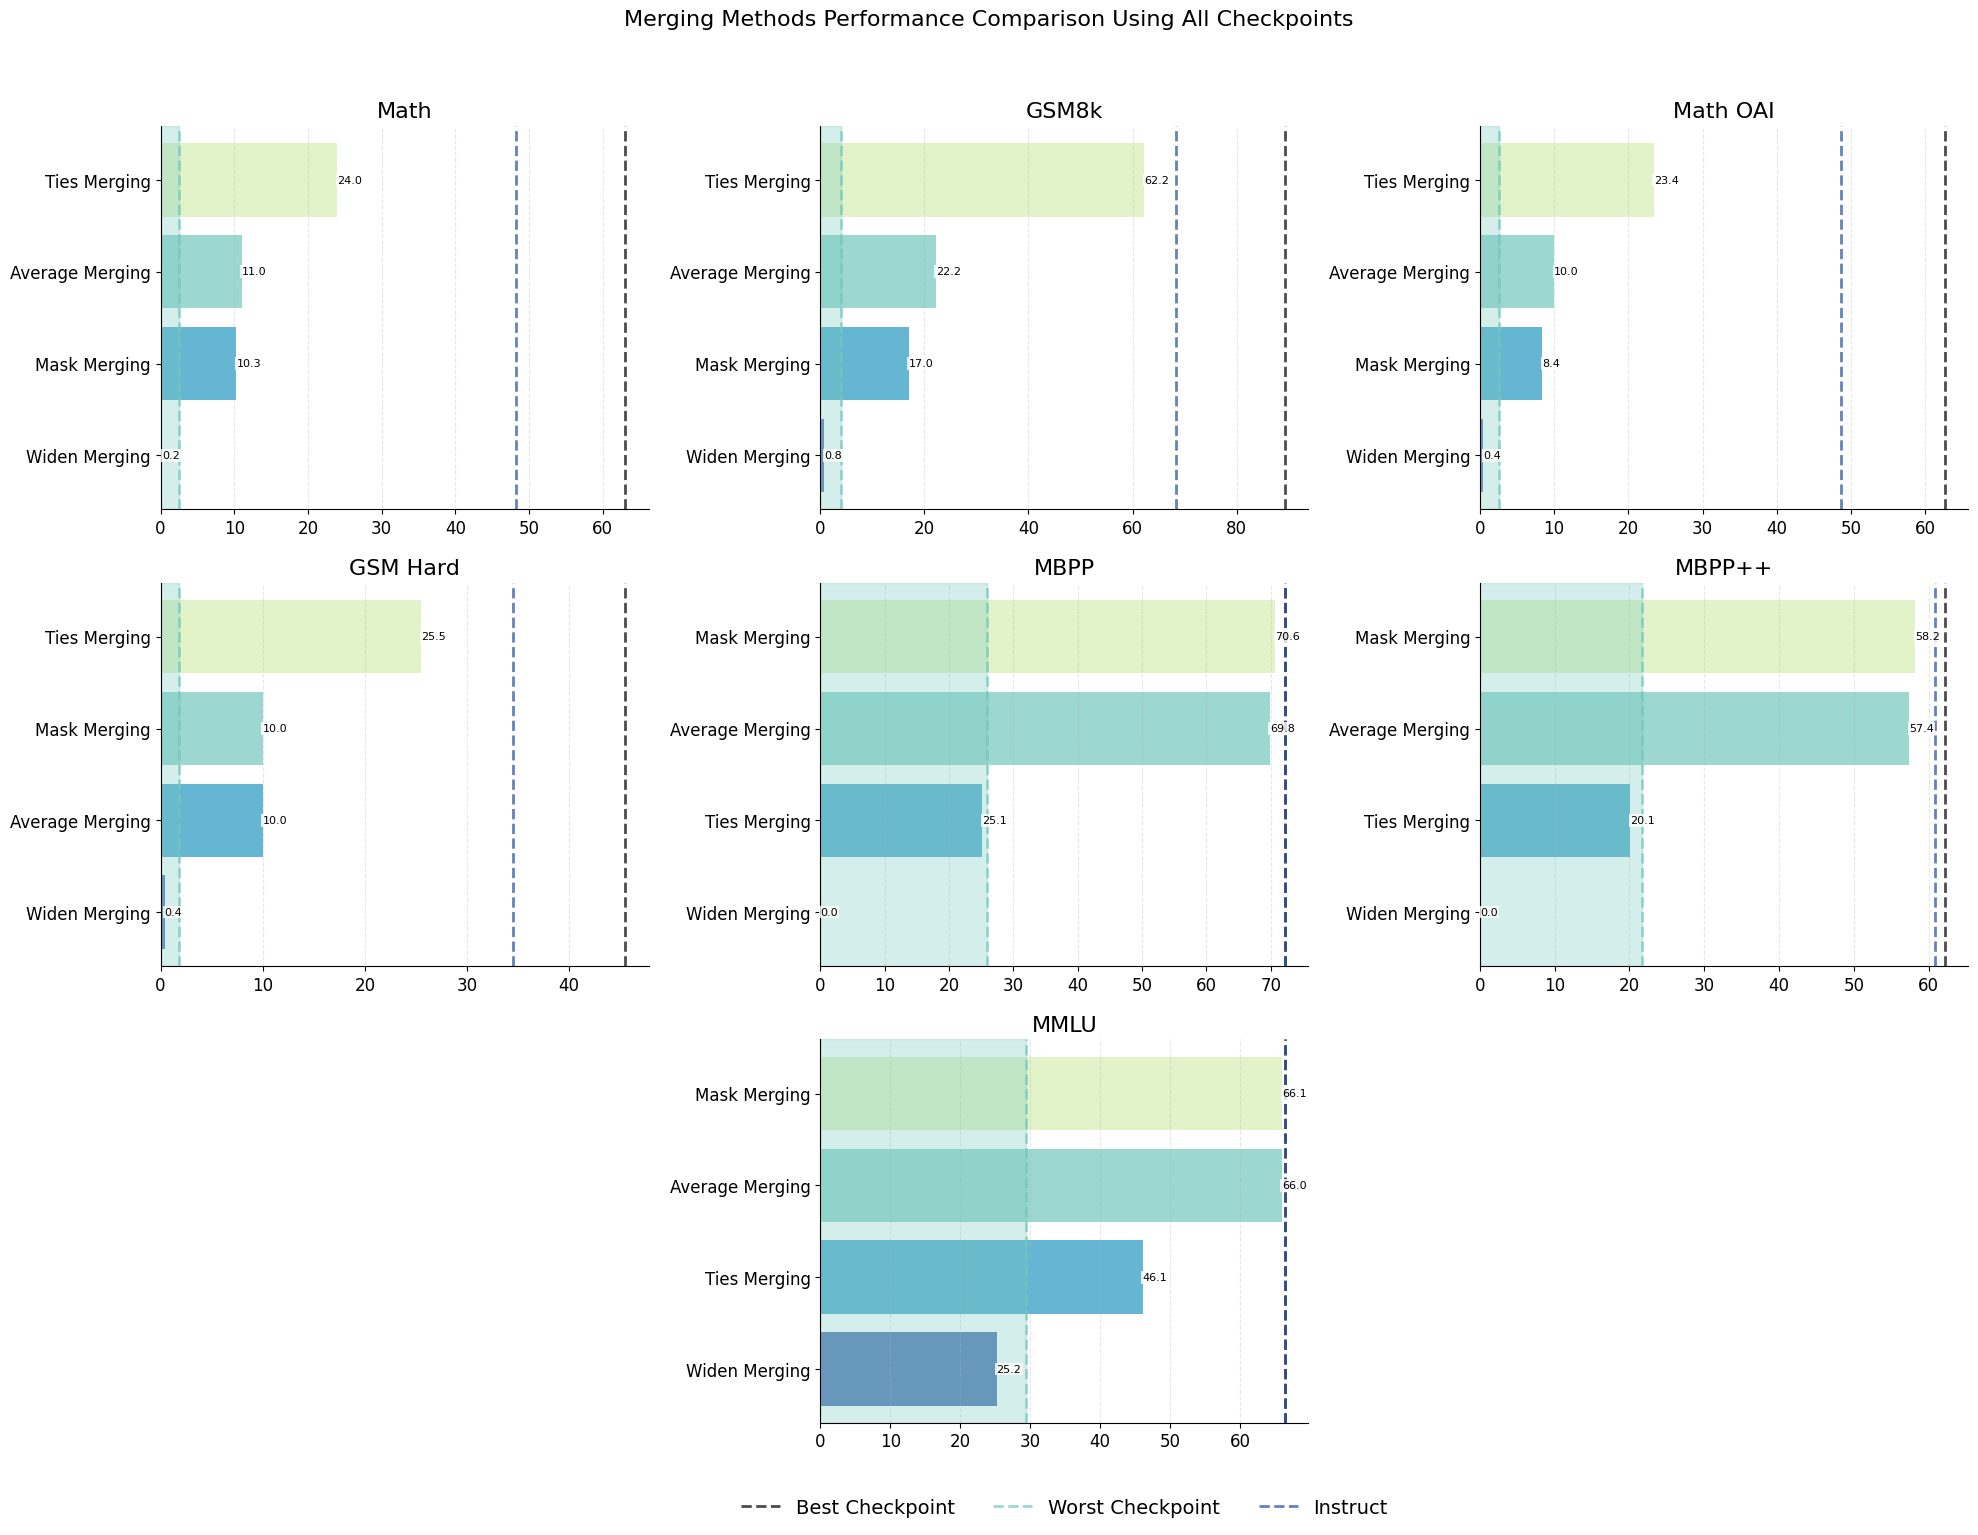

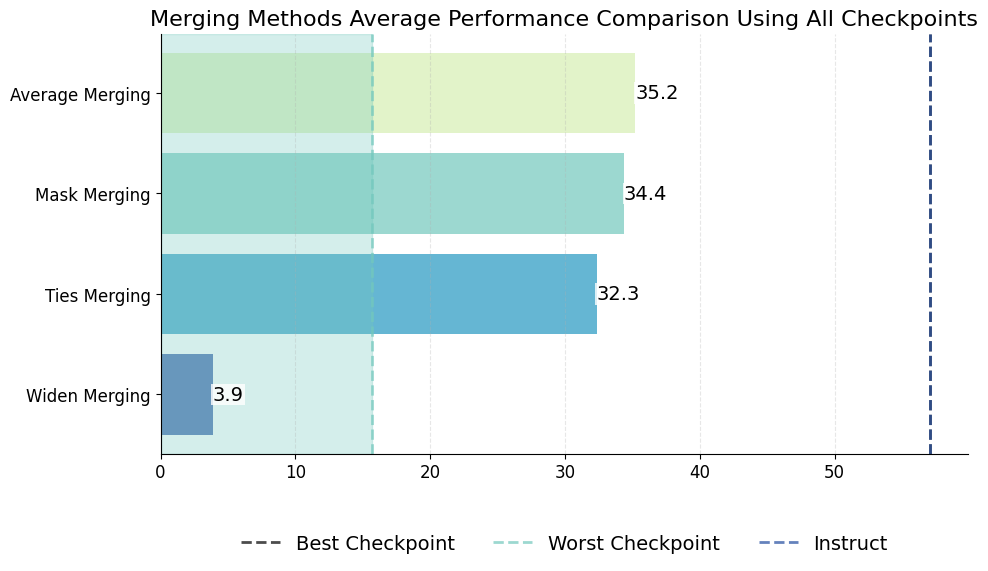

In [25]:
def plot_merging_comparison(merging_methods, title_prefix, selected_models=None):
    metrics = ['Math', 'GSM8k', 'Math OAI', 'GSM Hard', 'MBPP', 'MBPP++', 'MMLU']
    sequential_palette = sns.color_palette(cmap, n_colors=len(merging_methods))
    
    # Get reference performances from checkpoints
    checkpoints = Benchmark_Dict['Checkpoints']
    
    models_to_use = selected_models if selected_models else checkpoints.keys()
    
    best_scores = {}
    worst_scores = {}
    instruct_scores = {}

    for metric in metrics:
        scores = [checkpoints[model][metric] for model in models_to_use]
        best_scores[metric] = max(scores)
        worst_scores[metric] = min(scores)
        instruct_scores[metric] = checkpoints['Llama 3.1 8B Instruct'][metric]

    # Create figure
    plt.figure(figsize=(20, 15))
    n_rows = 3
    n_cols = 3
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 15))
    axes = axes.ravel()

    # Plot each metric
    for idx, metric in enumerate(metrics):
        if idx == len(metrics) - 1:
            ax = axes[-2]
        else:
            ax = axes[idx]
        
        # Create DataFrame for this metric
        method_scores = {method: scores[metric] for method, scores in merging_methods.items()}
        df_metric = pd.DataFrame(list(method_scores.items()), columns=['Method', 'Score'])
        df_metric = df_metric.sort_values('Score', ascending=True)
        
        # Plot bars
        bars = ax.barh(df_metric['Method'], df_metric['Score'],
                       color=sequential_palette[::-1],
                       alpha=0.7)
        
        # Add reference lines
        ax.axvline(x=best_scores[metric], color='black', linestyle='--', alpha=0.7, label='Best Checkpoint', lw=2)
        ax.axvline(x=worst_scores[metric], color=tuple(sequential_palette[1]), linestyle='--', alpha=0.7, label='Worst Checkpoint', lw=2)
        ax.axvline(x=instruct_scores[metric], color=tuple(sequential_palette[-1]), linestyle='--', alpha=0.7, label='Instruct', lw=2)
        ax.axvspan(0, worst_scores[metric], color=tuple(sequential_palette[1]), alpha=0.3)
        
        # Customize appearance
        ax.set_title(f'{metric}')
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.grid(axis='x', linestyle='--', alpha=0.3)
        
        # Add value labels on the bars
        for bar in bars:
            width = bar.get_width()
            ax.text(width, bar.get_y() + bar.get_height()/2,
                    f'{width:.1f}',
                    ha='left', va='center', fontsize=8,
                    bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', pad=1))
        
        # Add legend only for the last plot
        if idx == len(metrics) - 1:
            ax.legend(ncol=3, bbox_to_anchor=(0.5, -0.15), loc='upper center', frameon=False)

    # Remove empty subplots
    axes[-1].remove()
    axes[-3].remove()

    plt.suptitle(f'Merging Methods Performance Comparison {title_prefix}', fontsize=16, y=1.02)
    plt.tight_layout()
    plt.savefig(f'{title_prefix}.svg')
    plt.show()

    # Create average performance comparison
    plt.figure(figsize=(10, 6))
    method_averages = {method: sum(scores.values())/len(scores) 
                      for method, scores in merging_methods.items()}
    df_avg = pd.DataFrame(list(method_averages.items()), 
                         columns=['Method', 'Average Score']).sort_values('Average Score', ascending=True)

    ax = plt.gca()
    bars = ax.barh(df_avg['Method'], df_avg['Average Score'],
                   color=sequential_palette[::-1],
                   alpha=0.7)

    # Add reference lines for averages
    checkpoint_averages = {model: sum(scores.values())/len(scores) 
                          for model, scores in checkpoints.items()}
    best_avg = max(checkpoint_averages.values())
    worst_avg = min(checkpoint_averages.values())
    instruct_avg = checkpoint_averages['Llama 3.1 8B Instruct']

    ax.axvline(x=best_avg, color='black', linestyle='--', alpha=0.7, label='Best Checkpoint', lw=2)
    ax.axvline(x=worst_avg, color=tuple(sequential_palette[1]), linestyle='--', alpha=0.7, label='Worst Checkpoint', lw=2)
    ax.axvline(x=instruct_avg, color=tuple(sequential_palette[-1]), linestyle='--', alpha=0.7, label='Instruct', lw=2)
    ax.axvspan(0, worst_avg, color=tuple(sequential_palette[1]), alpha=0.3)

    # Customize appearance
    plt.title(f'Merging Methods Average Performance Comparison {title_prefix}')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.grid(axis='x', linestyle='--', alpha=0.3)

    # Add value labels
    for bar in bars:
        width = bar.get_width()
        ax.text(width, bar.get_y() + bar.get_height()/2,
                f'{width:.1f}',
                ha='left', va='center',
                bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', pad=1))

    plt.legend(ncol=3, bbox_to_anchor=(0.5, -0.15), loc='upper center', frameon=False)
    plt.tight_layout()
    plt.show()

# Call the function for all three cases
plot_merging_comparison(Benchmark_Dict['Mixtures']['All'], 
                       'Using All Checkpoints')

# plot_merging_comparison(Benchmark_Dict['Mixtures']['Filtered']['From Instruct'], 
#                        'Using Selected Checkpoints (From Instruct)',
#                        selected_models)

# plot_merging_comparison(Benchmark_Dict['Mixtures']['Filtered']['From Pretrained'], 
#                        'Using Selected Checkpoints (From Pretrained)',
#                        selected_models)

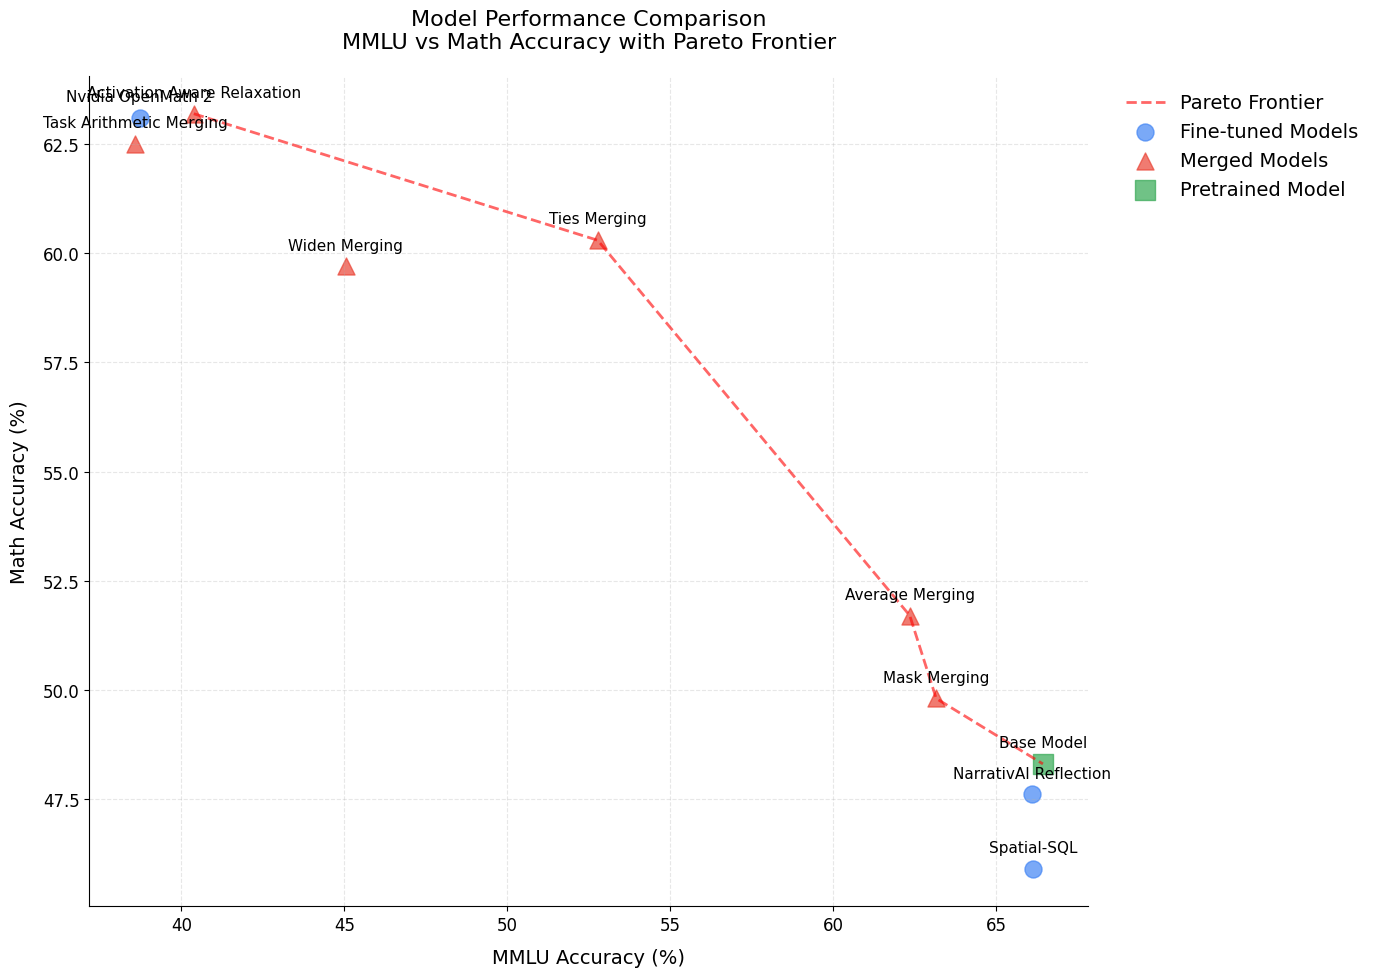

In [22]:
import json
import matplotlib.pyplot as plt
import numpy as np

def get_pareto_frontier(x, y):
    points = np.column_stack((x, y))
    pareto_points = []
    pareto_indices = []
    
    for i, point in enumerate(points):
        dominated = False
        for other_point in points:
            if (other_point[0] >= point[0] and other_point[1] >= point[1] and 
                (other_point[0] > point[0] or other_point[1] > point[1])):
                dominated = True
                break
        if not dominated:
            pareto_points.append(point)
            pareto_indices.append(i)
    
    pareto_points = np.array(pareto_points)
    sort_idx = pareto_points[:, 0].argsort()
    pareto_points = pareto_points[sort_idx]
    pareto_indices = [pareto_indices[i] for i in sort_idx]
    return pareto_points, pareto_indices

# Set global font sizes
plt.rcParams.update({
    'font.size': 14,
    'axes.titlesize': 16,
    'axes.labelsize': 14,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12
})

# Create the plot with larger figure size
plt.figure(figsize=(14, 10))  # Increased figure size to accommodate labels

# Define color and marker groups
reference_model = ["Llama 3.1 8B Instruct"]
finetuned = ['Llama 3.1 8B Nvidia OpenMath 2', 'Llama 3.1 8B NarrativAI Reflection', 'Llama 3.1 8B Instruct-Spatial-SQL']
mixed = list(Benchmark_Dict["Mixtures"]["Filtered"]["From Instruct"].keys())

# Get data points for Pareto frontier
mmlu_scores = (
    [Benchmark_Dict['Checkpoints'][model]['MMLU'] for model in finetuned] +
    [Benchmark_Dict["Mixtures"]["Filtered"]["From Instruct"][model]['MMLU'] for model in mixed] +
    [Benchmark_Dict['Checkpoints'][model]['MMLU'] for model in reference_model]
)
math_scores = (
    [Benchmark_Dict['Checkpoints'][model]['Math'] for model in finetuned] +
    [Benchmark_Dict["Mixtures"]["Filtered"]["From Instruct"][model]['Math'] for model in mixed] +
    [Benchmark_Dict['Checkpoints'][model]['Math'] for model in reference_model]
)

# Calculate Pareto frontier
pareto_points, pareto_indices = get_pareto_frontier(np.array(mmlu_scores), np.array(math_scores))

# Plot and annotate finetuned models
for model in finetuned:
    x = Benchmark_Dict['Checkpoints'][model]['MMLU']
    y = Benchmark_Dict['Checkpoints'][model]['Math']
    plt.scatter(x, y, color='#4285F4', marker='o', s=150, alpha=0.7)
    # Simplified label
    label = model.replace('Llama 3.1 8B ', '').replace('Instruct-', '')
    plt.annotate(label, (x, y), xytext=(0, 10), textcoords='offset points', 
                ha='center', va='bottom', fontsize=11)

# Plot and annotate mixed models
for model in mixed:
    x = Benchmark_Dict["Mixtures"]["Filtered"]["From Instruct"][model]['MMLU']
    y = Benchmark_Dict["Mixtures"]["Filtered"]["From Instruct"][model]['Math']
    plt.scatter(x, y, color='#EA4335', marker='^', s=150, alpha=0.7)
    plt.annotate(model, (x, y), xytext=(0, 10), textcoords='offset points', 
                ha='center', va='bottom', fontsize=11)

# Plot and annotate reference model
for model in reference_model:
    x = Benchmark_Dict['Checkpoints'][model]['MMLU']
    y = Benchmark_Dict['Checkpoints'][model]['Math']
    plt.scatter(x, y, color='#34A853', marker='s', s=200, alpha=0.7)
    plt.annotate('Base Model', (x, y), xytext=(0, 10), textcoords='offset points', 
                ha='center', va='bottom', fontsize=11)

# Plot Pareto frontier
plt.plot(pareto_points[:, 0], pareto_points[:, 1], 'r--', linewidth=2, label='Pareto Frontier', alpha=0.6)

# Add dummy points for legend
plt.scatter([], [], color='#4285F4', marker='o', s=150, label='Fine-tuned Models', alpha=0.7)
plt.scatter([], [], color='#EA4335', marker='^', s=150, label='Merged Models', alpha=0.7)
plt.scatter([], [], color='#34A853', marker='s', s=200, label='Pretrained Model', alpha=0.7)

# Customize the plot
plt.xlabel('MMLU Accuracy (%)', fontsize=14, labelpad=10)
plt.ylabel('Math Accuracy (%)', fontsize=14, labelpad=10)
plt.title('Model Performance Comparison\nMMLU vs Math Accuracy with Pareto Frontier', fontsize=16, pad=20)

# Add grid with custom style
plt.grid(True, linestyle='--', alpha=0.3)

# Customize spines
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add legend with better positioning
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', frameon=False)

# Adjust layout to prevent label cutoff
plt.tight_layout()

plt.show()

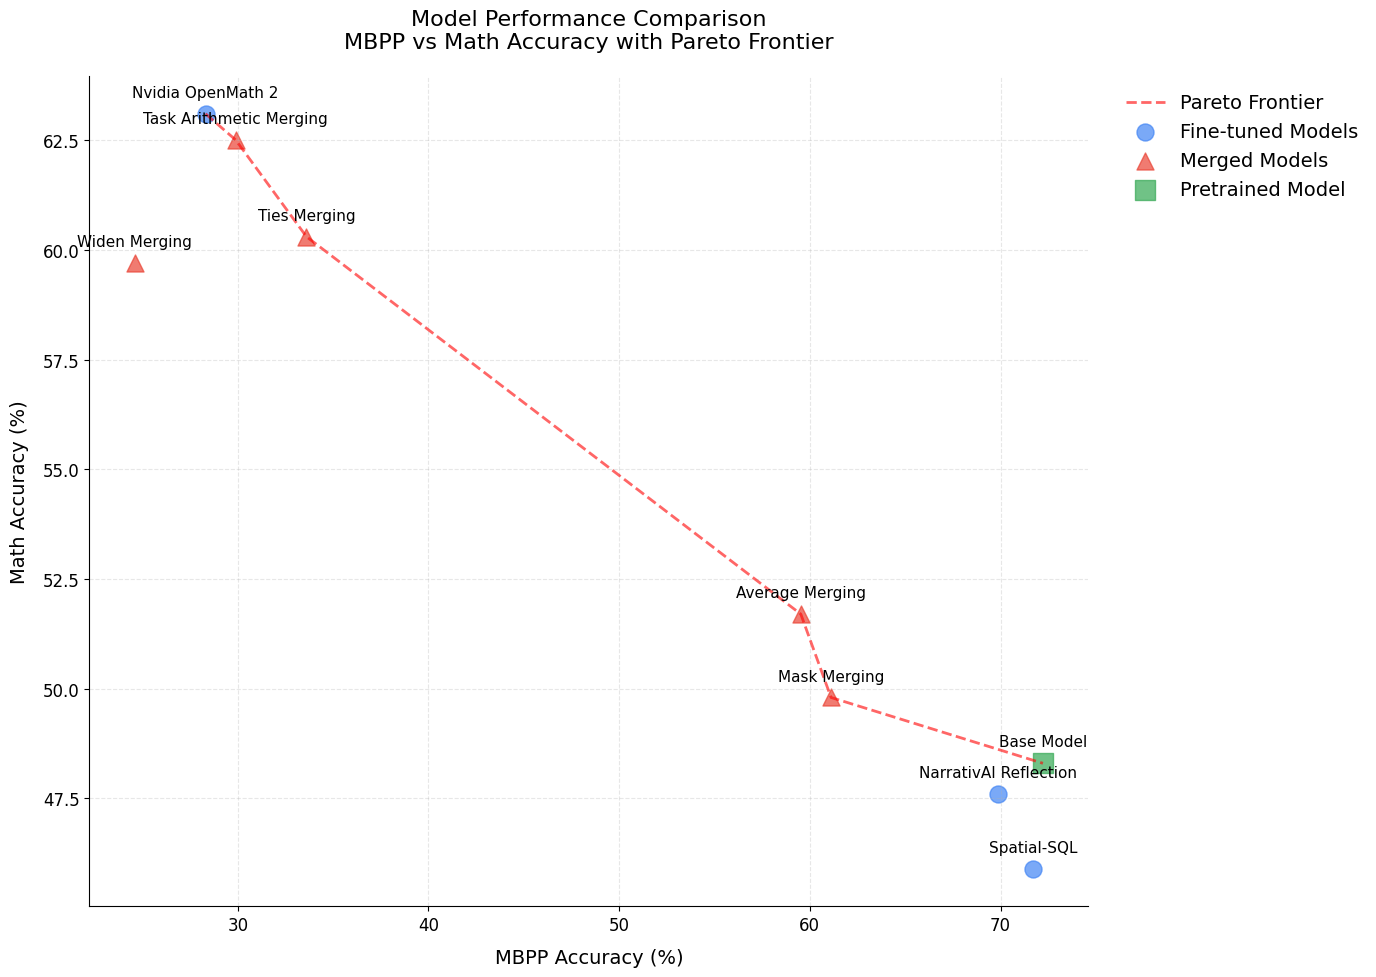

In [18]:
import json
import matplotlib.pyplot as plt
import numpy as np

def get_pareto_frontier(x, y):
    points = np.column_stack((x, y))
    pareto_points = []
    pareto_indices = []
    
    for i, point in enumerate(points):
        dominated = False
        for other_point in points:
            if (other_point[0] >= point[0] and other_point[1] >= point[1] and 
                (other_point[0] > point[0] or other_point[1] > point[1])):
                dominated = True
                break
        if not dominated:
            pareto_points.append(point)
            pareto_indices.append(i)
    
    pareto_points = np.array(pareto_points)
    sort_idx = pareto_points[:, 0].argsort()
    pareto_points = pareto_points[sort_idx]
    pareto_indices = [pareto_indices[i] for i in sort_idx]
    return pareto_points, pareto_indices

# Set global font sizes
plt.rcParams.update({
    'font.size': 14,
    'axes.titlesize': 16,
    'axes.labelsize': 14,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12
})

# Create the plot with larger figure size
plt.figure(figsize=(14, 10))  # Increased figure size to accommodate labels

# Define color and marker groups
reference_model = ["Llama 3.1 8B Instruct"]
finetuned = ['Llama 3.1 8B Nvidia OpenMath 2', 'Llama 3.1 8B NarrativAI Reflection', 'Llama 3.1 8B Instruct-Spatial-SQL']
mixed = list(Benchmark_Dict["Mixtures"]["Filtered"]["From Instruct"].keys())

# Get data points for Pareto frontier
mmlu_scores = (
    [Benchmark_Dict['Checkpoints'][model]['MBPP'] for model in finetuned] +
    [Benchmark_Dict["Mixtures"]["Filtered"]["From Instruct"][model]['MBPP'] for model in mixed] +
    [Benchmark_Dict['Checkpoints'][model]['MBPP'] for model in reference_model]
)
math_scores = (
    [Benchmark_Dict['Checkpoints'][model]['Math'] for model in finetuned] +
    [Benchmark_Dict["Mixtures"]["Filtered"]["From Instruct"][model]['Math'] for model in mixed] +
    [Benchmark_Dict['Checkpoints'][model]['Math'] for model in reference_model]
)

# Calculate Pareto frontier
pareto_points, pareto_indices = get_pareto_frontier(np.array(mmlu_scores), np.array(math_scores))

# Plot and annotate finetuned models
for model in finetuned:
    x = Benchmark_Dict['Checkpoints'][model]['MBPP']
    y = Benchmark_Dict['Checkpoints'][model]['Math']
    plt.scatter(x, y, color='#4285F4', marker='o', s=150, alpha=0.7)
    # Simplified label
    label = model.replace('Llama 3.1 8B ', '').replace('Instruct-', '')
    plt.annotate(label, (x, y), xytext=(0, 10), textcoords='offset points', 
                ha='center', va='bottom', fontsize=11)

# Plot and annotate mixed models
for model in mixed:
    x = Benchmark_Dict["Mixtures"]["Filtered"]["From Instruct"][model]['MBPP']
    y = Benchmark_Dict["Mixtures"]["Filtered"]["From Instruct"][model]['Math']
    plt.scatter(x, y, color='#EA4335', marker='^', s=150, alpha=0.7)
    plt.annotate(model, (x, y), xytext=(0, 10), textcoords='offset points', 
                ha='center', va='bottom', fontsize=11)

# Plot and annotate reference model
for model in reference_model:
    x = Benchmark_Dict['Checkpoints'][model]['MBPP']
    y = Benchmark_Dict['Checkpoints'][model]['Math']
    plt.scatter(x, y, color='#34A853', marker='s', s=200, alpha=0.7)
    plt.annotate('Base Model', (x, y), xytext=(0, 10), textcoords='offset points', 
                ha='center', va='bottom', fontsize=11)

# Plot Pareto frontier
plt.plot(pareto_points[:, 0], pareto_points[:, 1], 'r--', linewidth=2, label='Pareto Frontier', alpha=0.6)

# Add dummy points for legend
plt.scatter([], [], color='#4285F4', marker='o', s=150, label='Fine-tuned Models', alpha=0.7)
plt.scatter([], [], color='#EA4335', marker='^', s=150, label='Merged Models', alpha=0.7)
plt.scatter([], [], color='#34A853', marker='s', s=200, label='Pretrained Model', alpha=0.7)

# Customize the plot
plt.xlabel('MBPP Accuracy (%)', fontsize=14, labelpad=10)
plt.ylabel('Math Accuracy (%)', fontsize=14, labelpad=10)
plt.title('Model Performance Comparison\nMBPP vs Math Accuracy with Pareto Frontier', fontsize=16, pad=20)

# Add grid with custom style
plt.grid(True, linestyle='--', alpha=0.3)

# Customize spines
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add legend with better positioning
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', frameon=False)

# Adjust layout to prevent label cutoff
plt.tight_layout()

plt.show()

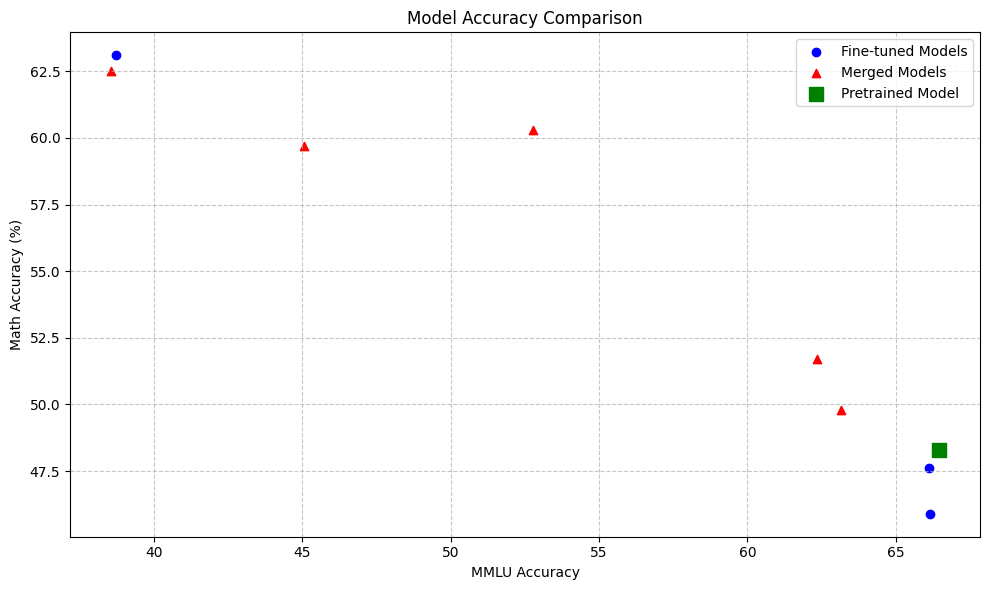

In [17]:
import json
import matplotlib.pyplot as plt
import numpy as np

# Create the plot
plt.figure(figsize=(10, 6))

# Define color and marker groups
reference_model = ["Llama 3.1 8B Instruct"]
finetuned = ['Llama 3.1 8B Nvidia OpenMath 2', 'Llama 3.1 8B NarrativAI Reflection', 'Llama 3.1 8B Instruct-Spatial-SQL']
mixed = list(Benchmark_Dict["Mixtures"]["Filtered"]["From Instruct"].keys())

# Plot each group with different colors and markers
plt.scatter(
    [Benchmark_Dict['Checkpoints'][model]['MMLU'] for model in finetuned], 
    [Benchmark_Dict['Checkpoints'][model]['Math'] for model in finetuned], 
    color='blue', 
    label='Fine-tuned Models', 
    marker='o'
)

plt.scatter(
    [Benchmark_Dict["Mixtures"]["Filtered"]["From Instruct"][model]['MMLU'] for model in mixed], 
    [Benchmark_Dict["Mixtures"]["Filtered"]["From Instruct"][model]['Math'] for model in mixed], 
    color='red', 
    label='Merged Models', 
    marker='^'
)

plt.scatter(
    [Benchmark_Dict['Checkpoints'][model]['MMLU'] for model in reference_model], 
    [Benchmark_Dict['Checkpoints'][model]['Math'] for model in reference_model], 
    color='green', 
    label='Pretrained Model', 
    marker='s', 
    s=100  # Make reference model markers larger
)

# Annotate each point with model names
# for model in models:
#     plt.annotate(
#         model, 
#         (data[model]['mmlu'], data[model]['math']), 
#         xytext=(5, 5), 
#         textcoords='offset points'
#     )

# Customize the plot
plt.xlabel('MMLU Accuracy')
plt.ylabel('Math Accuracy (%)')
plt.title('Model Accuracy Comparison')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

plt.tight_layout()
plt.show()

# Note: Replace the sample data dictionary with your actual parsed JSON data
# You'll need to extract the MMLU overall accuracy and math accuracy for each model

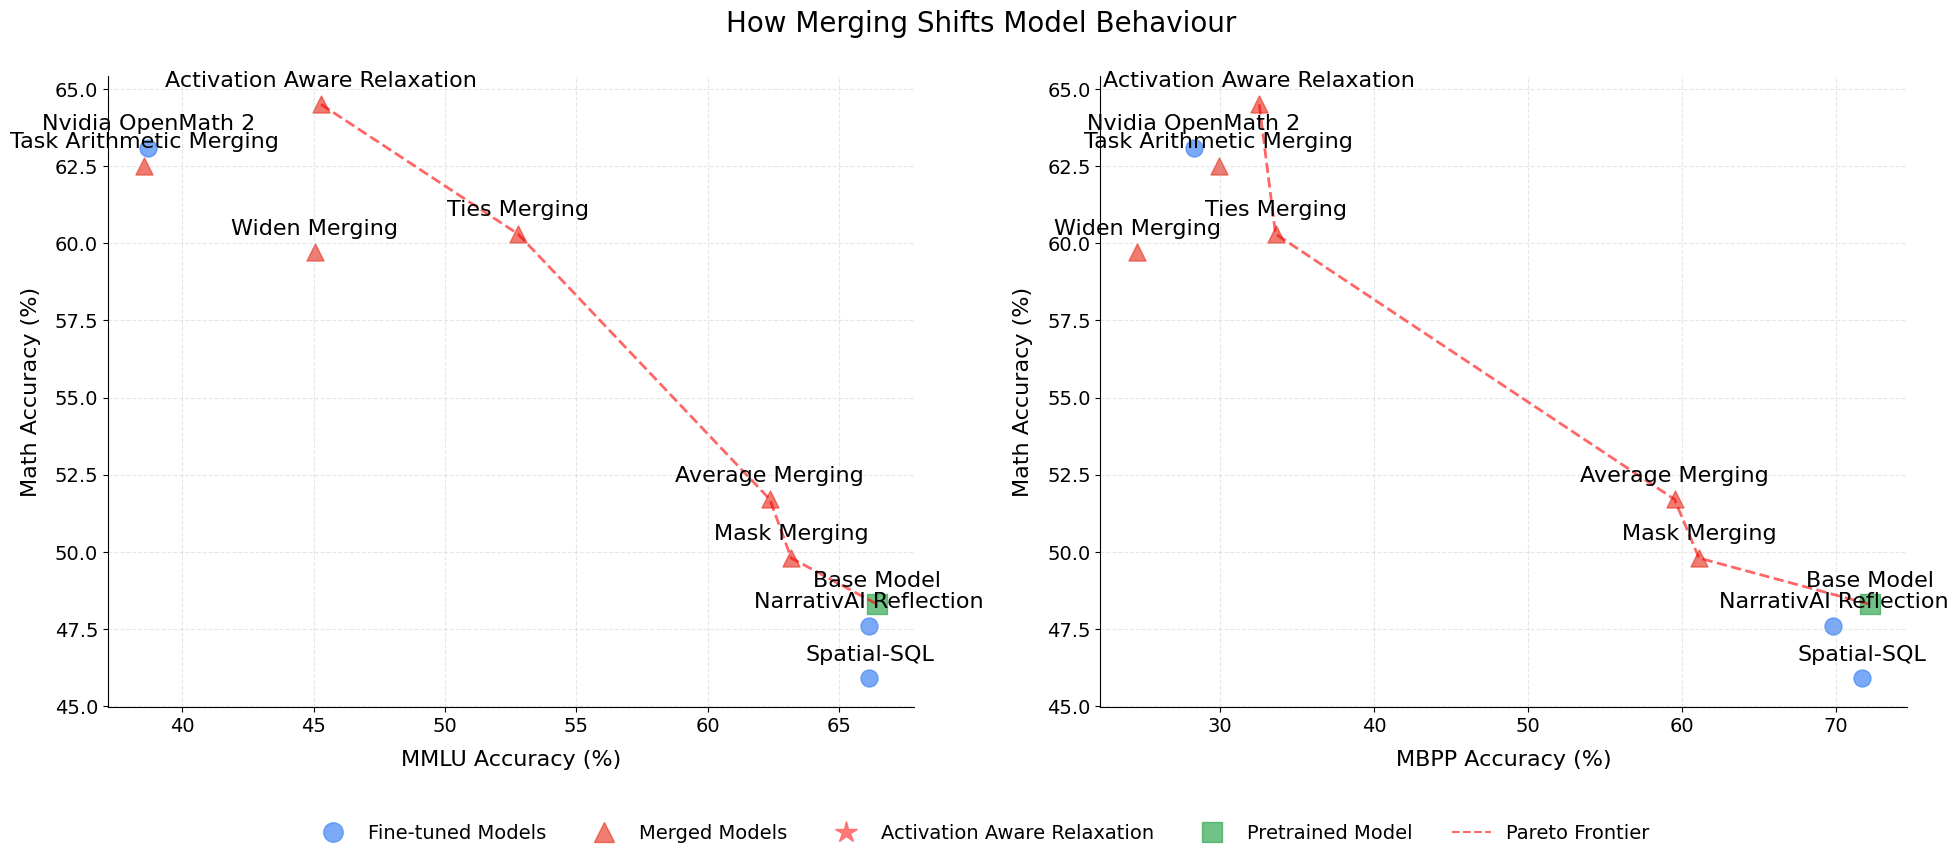

In [ ]:
import json
import matplotlib.pyplot as plt
import numpy as np

def get_pareto_frontier(x, y):
    points = np.column_stack((x, y))
    pareto_points = []
    pareto_indices = []
    
    for i, point in enumerate(points):
        dominated = False
        for other_point in points:
            if (other_point[0] >= point[0] and other_point[1] >= point[1] and 
                (other_point[0] > point[0] or other_point[1] > point[1])):
                dominated = True
                break
        if not dominated:
            pareto_points.append(point)
            pareto_indices.append(i)
    
    pareto_points = np.array(pareto_points)
    sort_idx = pareto_points[:, 0].argsort()
    pareto_points = pareto_points[sort_idx]
    pareto_indices = [pareto_indices[i] for i in sort_idx]
    return pareto_points, pareto_indices

# Set global font sizes
plt.rcParams.update({
    'font.size': 16,
    'axes.titlesize': 16,
    'axes.labelsize': 16,
    'xtick.labelsize': 14,
    'ytick.labelsize': 14
})

# Create figure with subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
fig.suptitle('How Merging Shifts Model Behaviour', fontsize=20, y=0.98)

# Define color and marker groups
reference_model = ["Llama 3.1 8B Instruct"]
finetuned = ['Llama 3.1 8B Nvidia OpenMath 2', 'Llama 3.1 8B NarrativAI Reflection', 'Llama 3.1 8B Instruct-Spatial-SQL']
mixed = list(Benchmark_Dict["Mixtures"]["Filtered"]["From Instruct"].keys())

# Function to plot on a specific axis
def create_plot(ax, x_metric, y_metric='Math', x_label=''):
    # Get data points for Pareto frontier
    x_scores = (
        [Benchmark_Dict['Checkpoints'][model][x_metric] for model in finetuned] +
        [Benchmark_Dict["Mixtures"]["Filtered"]["From Instruct"][model][x_metric] for model in mixed] +
        [Benchmark_Dict['Checkpoints'][model][x_metric] for model in reference_model]
    )
    y_scores = (
        [Benchmark_Dict['Checkpoints'][model][y_metric] for model in finetuned] +
        [Benchmark_Dict["Mixtures"]["Filtered"]["From Instruct"][model][y_metric] for model in mixed] +
        [Benchmark_Dict['Checkpoints'][model][y_metric] for model in reference_model]
    )
    
    # Calculate Pareto frontier
    pareto_points, pareto_indices = get_pareto_frontier(np.array(x_scores), np.array(y_scores))
    
    # Plot and annotate finetuned models
    for model in finetuned:
        x = Benchmark_Dict['Checkpoints'][model][x_metric]
        y = Benchmark_Dict['Checkpoints'][model][y_metric]
        color = '#4285F4'
        ax.scatter(x, y, color=color, marker='o', s=150, alpha=0.7)
        label = model.replace('Llama 3.1 8B ', '').replace('Instruct-', '')
        ax.annotate(label, (x, y), xytext=(0, 10), textcoords='offset points', 
                   ha='center', va='bottom', fontsize=15, color=color)

    # Plot and annotate mixed models
    for model in mixed:
        x = Benchmark_Dict["Mixtures"]["Filtered"]["From Instruct"][model][x_metric]
        y = Benchmark_Dict["Mixtures"]["Filtered"]["From Instruct"][model][y_metric]
        
        # Distinguish "activation aware relaxation" model
        if model == "activation aware relaxation":
            color = '#FF6B6B'
            ax.scatter(x, y, color=color, marker='*', s=250, alpha=0.9, edgecolor='black', linewidth=1)
        else:
            color = '#EA4335'
            ax.scatter(x, y, color=color, marker='^', s=150, alpha=0.7)
        
        ax.annotate(model, (x, y), xytext=(0, 10), textcoords='offset points', 
                   ha='center', va='bottom', fontsize=15, color=color)

    # Plot and annotate reference model
    for model in reference_model:
        x = Benchmark_Dict['Checkpoints'][model][x_metric]
        y = Benchmark_Dict['Checkpoints'][model][y_metric]
        color = '#34A853'
        ax.scatter(x, y, color=color, marker='s', s=200, alpha=0.7)
        ax.annotate('Base Model', (x, y), xytext=(0, 10), textcoords='offset points', 
                   ha='center', va='bottom', fontsize=15, color=color)

    # Plot Pareto frontier
    ax.plot(pareto_points[:, 0], pareto_points[:, 1], 'r--', linewidth=2, alpha=0.6)
    
    # Customize the plot
    ax.set_xlabel(f'{x_label} Accuracy (%)', fontsize=16, labelpad=10)
    ax.set_ylabel('Math Accuracy (%)', fontsize=16, labelpad=10)
    ax.grid(True, linestyle='--', alpha=0.3)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

# Create both plots
create_plot(ax1, 'MMLU', x_label='MMLU')
create_plot(ax2, 'MBPP', x_label='MBPP')

# Add a single legend at the bottom
lines = [
    plt.Line2D([], [], color='#4285F4', marker='o', linestyle='None', markersize=14, label='Fine-tuned Models', alpha=0.7),
    plt.Line2D([], [], color='#EA4335', marker='^', linestyle='None', markersize=14, label='Merged Models', alpha=0.7),
    plt.Line2D([], [], color='#FF6B6B', marker='*', linestyle='None', markersize=16, label='Activation Aware Relaxation', alpha=0.9),
    plt.Line2D([], [], color='#34A853', marker='s', linestyle='None', markersize=14, label='Pretrained Model', alpha=0.7),
    plt.Line2D([], [], color='r', linestyle='--', label='Pareto Frontier', alpha=0.6)
]

# Place legend at the bottom center with reduced vertical spacing
fig.legend(handles=lines, loc='center', bbox_to_anchor=(0.5, -0.05), ncol=5, frameon=False, fontsize=14)

# Adjust layout
plt.tight_layout()

plt.savefig('pareto.svg')

plt.show()

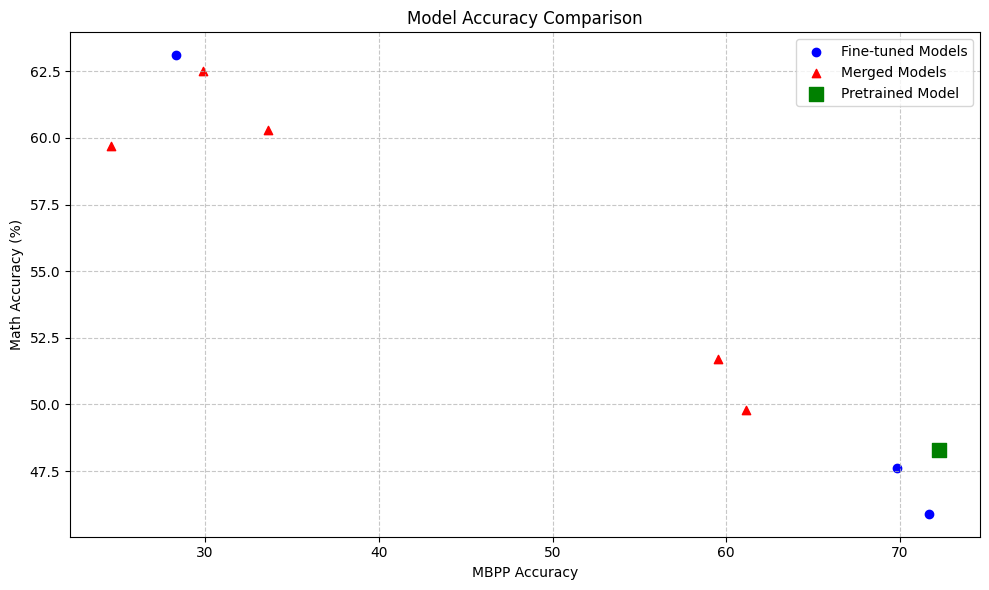

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Create the plot
plt.figure(figsize=(10, 6))

# Define color and marker groups
reference_model = ["Llama 3.1 8B Instruct"]
finetuned = ['Llama 3.1 8B Nvidia OpenMath 2', 'Llama 3.1 8B NarrativAI Reflection', 'Llama 3.1 8B Instruct-Spatial-SQL']
mixed = list(Benchmark_Dict["Mixtures"]["Filtered"]["From Instruct"].keys())

# Plot each group with different colors and markers
plt.scatter(
    [Benchmark_Dict['Checkpoints'][model]['MBPP'] for model in finetuned], 
    [Benchmark_Dict['Checkpoints'][model]['Math'] for model in finetuned], 
    color='blue', 
    label='Fine-tuned Models', 
    marker='o'
)

plt.scatter(
    [Benchmark_Dict["Mixtures"]["Filtered"]["From Instruct"][model]['MBPP'] for model in mixed], 
    [Benchmark_Dict["Mixtures"]["Filtered"]["From Instruct"][model]['Math'] for model in mixed], 
    color='red', 
    label='Merged Models', 
    marker='^'
)

plt.scatter(
    [Benchmark_Dict['Checkpoints'][model]['MBPP'] for model in reference_model], 
    [Benchmark_Dict['Checkpoints'][model]['Math'] for model in reference_model], 
    color='green', 
    label='Pretrained Model', 
    marker='s', 
    s=100  # Make reference model markers larger
)

# Annotate each point with model names
# for model in models:
#     plt.annotate(
#         model, 
#         (data[model]['mmlu'], data[model]['math']), 
#         xytext=(5, 5), 
#         textcoords='offset points'
#     )

# Customize the plot
plt.xlabel('MBPP Accuracy')
plt.ylabel('Math Accuracy (%)')
plt.title('Model Accuracy Comparison')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

plt.tight_layout()
plt.show()

# Note: Replace the sample data dictionary with your actual parsed JSON data
# You'll need to extract the MMLU overall accuracy and math accuracy for each model

In [12]:
Benchmark_Dict["Mixtures"]["Filtered"]["From Instruct"]["Average Merging"]

{'Math': 51.7,
 'GSM8k': 78.2,
 'Math OAI': 49.0,
 'GSM Hard': 41.2,
 'MBPP': 59.523809523809526,
 'MBPP++': 48.41269841269841,
 'MMLU': 62.35578977353653}